# Librerias

In [ ]:
import numpy as np
from  cv2 import imread
import matplotlib.pyplot as plt

In [ ]:
def howis(img):
  print('size = ',img.shape)
  print('max  = ',np.max(img))
  print('min  = ',np.min(img))

# Lectura de imagen a color

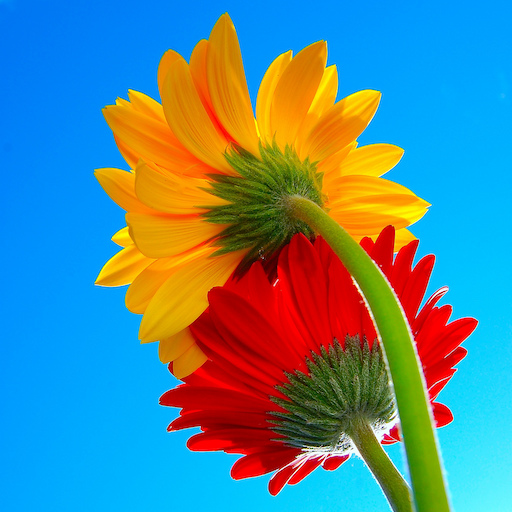

size =  (512, 512, 3)
max  =  255
min  =  0


In [ ]:
Icv = imread('flowers.jpg')      # lectura en formato opencv (BGR)
plt.imshow(Icv)
howis(Icv)

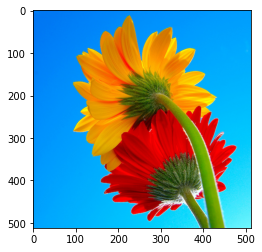

In [ ]:
I = Icv[:,:,[2,1,0]]             # conversion a formato estándar (RGB)
plt.imshow(I)
plt.show()

# Canales de color

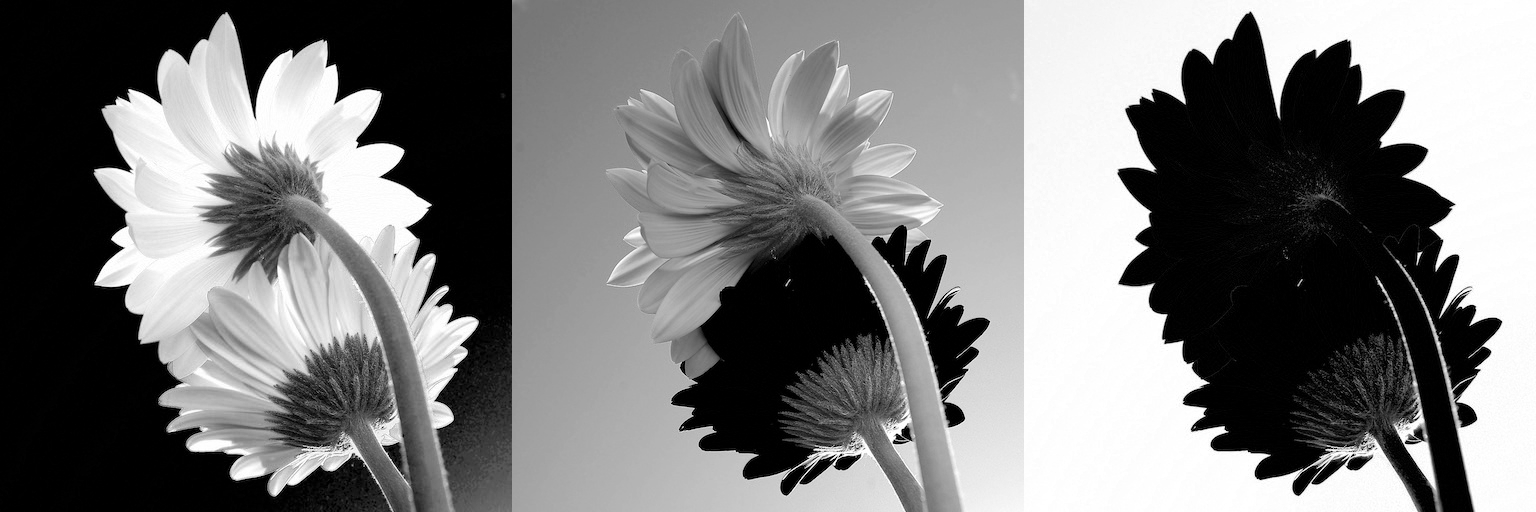

In [ ]:
R = I[:,:,0]
G = I[:,:,1]
B = I[:,:,2]
RGB = np.concatenate((R,G,B),axis=1)
plt.imshow(RGB)

# Conversion a blanco y negro (tonos de gris)

size =  (512, 512)
max  =  255
min  =  0


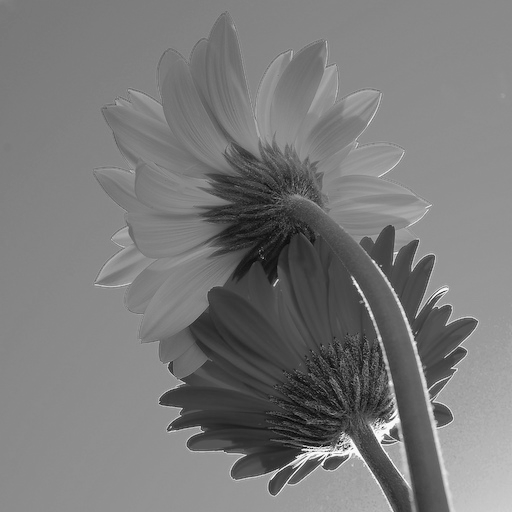

In [ ]:
Rd = R.astype(float)
Gd = G.astype(float)
Bd = B.astype(float)
k  = (1/3,1/3,1/3)
Zd = k[0]*Rd+k[1]*Gd+k[2]*Bd
Z  = Zd.astype(int)
howis(Z)
plt.imshow(Z)

# Histograma

In [ ]:
def imhist(X):
  (N,M) = X.shape
  n = 256
  h = np.zeros((256,))
  for i in range(N):
    for j in range(M):
      x = X[i,j]
      h[x] = h[x]+1
  plt.plot(range(n),h[0:n])
  plt.show()


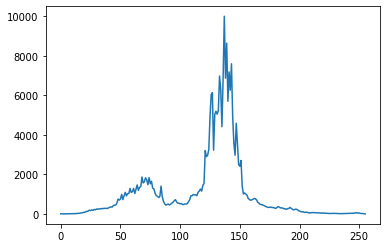

In [ ]:
imhist(Z)

# Segmentación de la Flor Roja

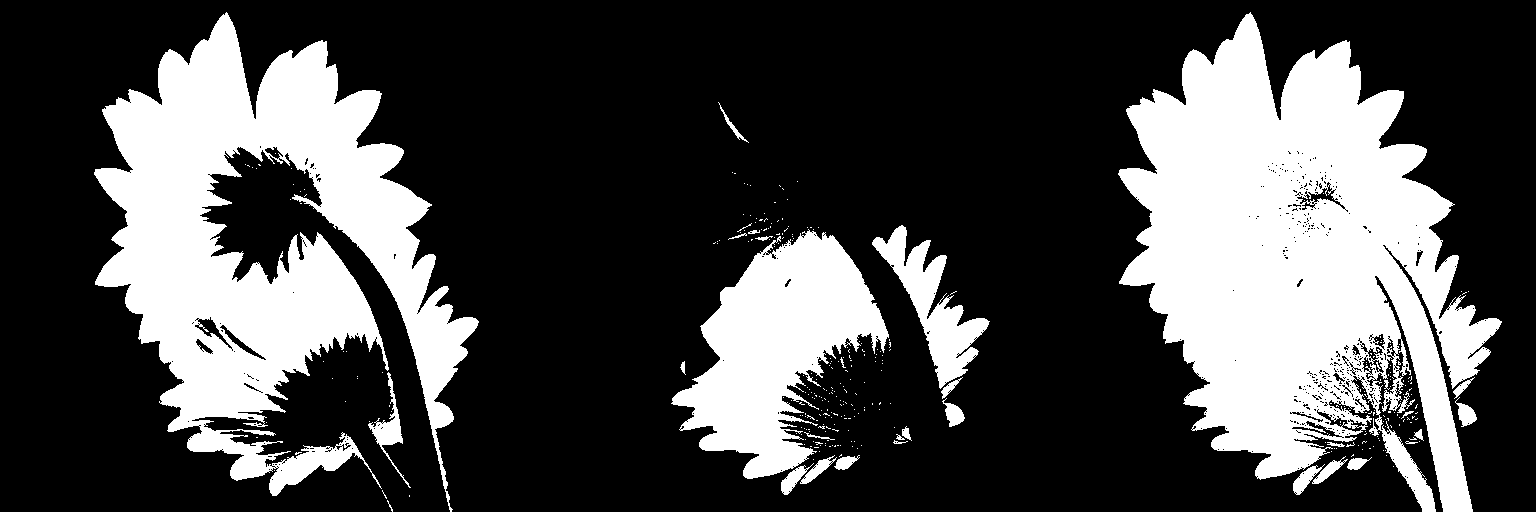

In [ ]:
Sr = R>150
Sg = G<40
Sb = B<40 
Srgb = np.concatenate((Sr,Sg,Sb),axis=1)
plt.imshow(Srgb*255)

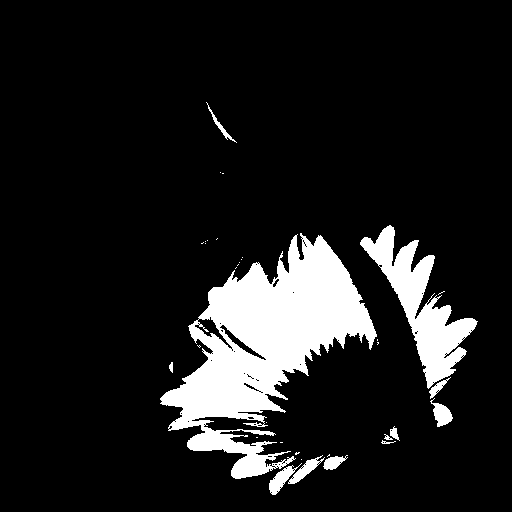

In [ ]:
S = np.logical_and(Sr,Sg,Sb)
plt.imshow(S*255)

# Eliminación de filas con pocos unos

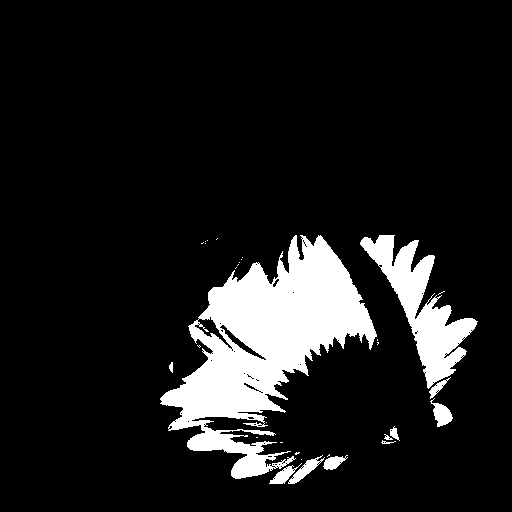

In [ ]:
(N,M) = S.shape
Q = S
for i in range(N):
  s = np.sum(S[i,:])
  if s<20:
    Q[i,:] = 0
plt.imshow(Q*255)

# Búsqueda de (imin,jmin) y (imax,jmax) en la región segmetada

In [ ]:
imin = 1000
imax = 0
jmin = 1000
jmax = 0
for i in range(N):
  for j in range(M):
    if Q[i,j]>0:
      if i<imin:
        imin = i
      if i>imax:
        imax = i
      if j<jmin:
        jmin = j
      if j>jmax:
        jmax = j

# Gráfica de Bounding Box

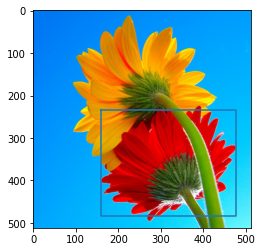

In [ ]:
y = [imin,imin,imax,imax,imin]
x = [jmin,jmax,jmax,jmin,jmin]
plt.imshow(I)
plt.plot(x,y)
plt.show()

# Detección de Bordes

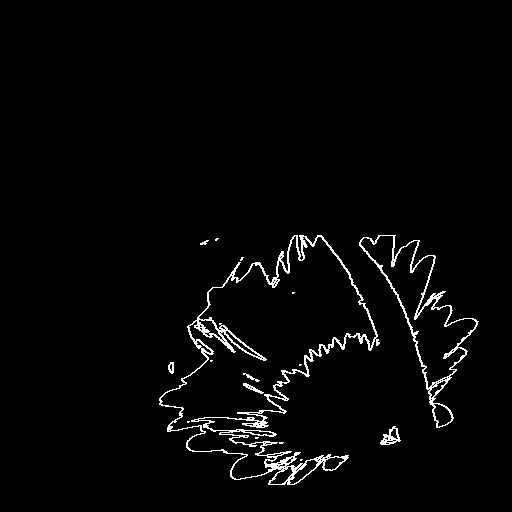

In [ ]:
E = np.zeros((N,M),np.uint8)
for i in range(N):
  for j in range(1,M):
    if Q[i,j]!=Q[i,j-1]: 
      E[i,j]   = 1
      E[i,j-1] = 1
for i in range(1,N):
  for j in range(M):
    if Q[i-1,j]!=Q[i,j]: 
      E[i,j]   = 1
      E[i,j-1] = 1
plt.imshow(E*255)


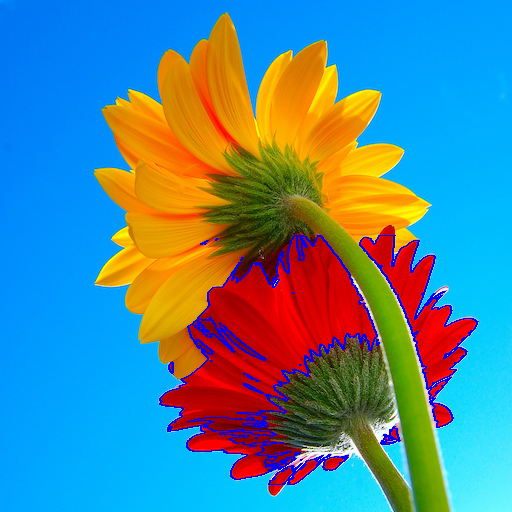

In [ ]:
for i in range(N):
  for j in range(M):
    if E[i,j]==1:
      Icv[i,j,:] = [255,0,0]
plt.imshow(Icv)